## Load: Rashid's Molecular Dynamics Dataset 

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1mii_ML.csv', index_col=0) # set index as 'Frame' (i.e. the time in the simulation)
index = 'Frame'

# df = pd.read_csv('1mii_ML.csv', index_col=3) # set index as 'RMSD' (i.e. the time in the simulation)
# index = 'RMSD'

column_names = df.columns[0:len(df.columns) - 1]
print(column_names)

# goals: minimize RMSD and total energy

df.head()

Index(['Hbonds', 'Molsurf', 'RMSD', 'ROG', 'end-to-end', 'energy_angle',
       'energy_bond', 'energy_dihedral', 'energy_elec', 'energy_elec14',
       'energy_gb', 'energy_vdw', 'energy_vdw14', 'ss_3-10', 'ss_APBS',
       'ss_PBS', 'ss_alpha', 'ss_bend', 'ss_none', 'ss_pi'],
      dtype='object')


,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,-82.217559,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,-81.428032,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,-85.804202,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,-81.468523,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,-87.046542,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059


## Descriptive Statistics of Features

In [220]:
df.describe()

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.303480,712.918745,2.436149,6.891291,10.213339,141.400571,41.815779,212.035426,-1062.970717,692.458955,...,-76.807479,41.302760,4.500294,0.098000,0.0,23.601941,18.465588,32.727059,0.243529,20.314529
std,1.356392,24.231206,0.729003,0.206231,2.183403,10.890576,6.196861,6.656541,35.402334,13.306025,...,5.316868,2.978070,9.092513,1.070892,0.0,12.375193,8.579102,7.480982,2.732150,11.950151
min,0.000000,613.168142,0.556156,6.225668,3.307014,98.447172,20.724943,187.721375,-1211.892263,638.019094,...,-98.252769,30.744799,0.000000,0.000000,0.0,0.000000,0.000000,11.764706,0.000000,0.000000
25%,1.000000,696.938911,1.922509,6.744024,8.990611,134.024942,37.484184,207.503152,-1080.961223,683.351456,...,-80.366477,39.253790,0.000000,0.000000,0.0,23.529412,11.764706,29.411765,0.000000,11.764706
50%,2.000000,713.464995,2.279555,6.888237,10.457180,141.699559,41.671991,211.850178,-1057.099887,692.846660,...,-76.797692,41.198407,0.000000,0.000000,0.0,23.529412,17.647059,29.411765,0.000000,17.647059
75%,3.000000,728.890303,2.809507,7.034832,11.783581,148.948314,45.963160,216.323829,-1038.926795,701.847592,...,-73.233943,43.237519,0.000000,0.000000,0.0,29.411765,23.529412,35.294118,0.000000,29.411765
max,9.000000,810.767202,5.280286,8.025102,15.464560,189.116158,70.670769,249.904017,-959.916749,746.729475,...,-48.010786,58.468123,70.588235,17.647059,0.0,58.823529,70.588235,70.588235,47.058824,76.470588


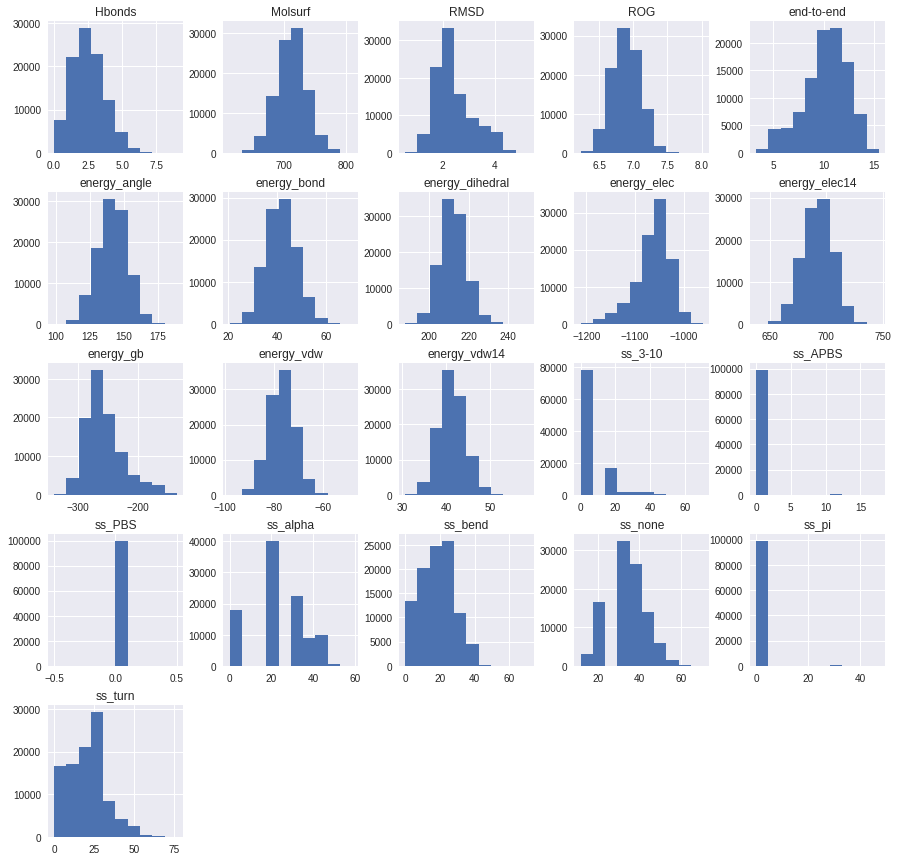

In [221]:
df.hist(figsize=(15,15))
plt.show()

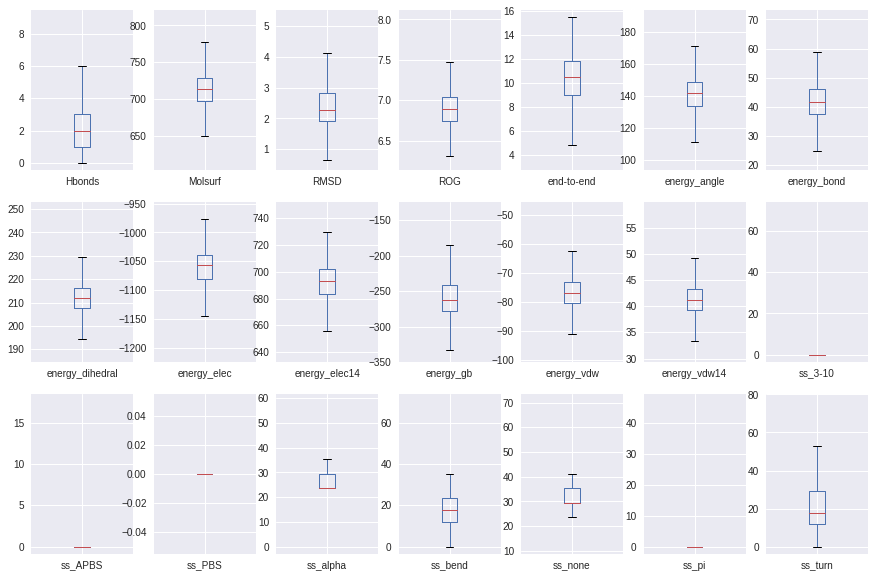

In [222]:
df.plot(kind='box', layout=(3,7), subplots=True, sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [223]:
column_x = df.columns[0:len(df.columns) - 1]
column_x

Index(['Hbonds', 'Molsurf', 'RMSD', 'ROG', 'end-to-end', 'energy_angle',
       'energy_bond', 'energy_dihedral', 'energy_elec', 'energy_elec14',
       'energy_gb', 'energy_vdw', 'energy_vdw14', 'ss_3-10', 'ss_APBS',
       'ss_PBS', 'ss_alpha', 'ss_bend', 'ss_none', 'ss_pi'],
      dtype='object')

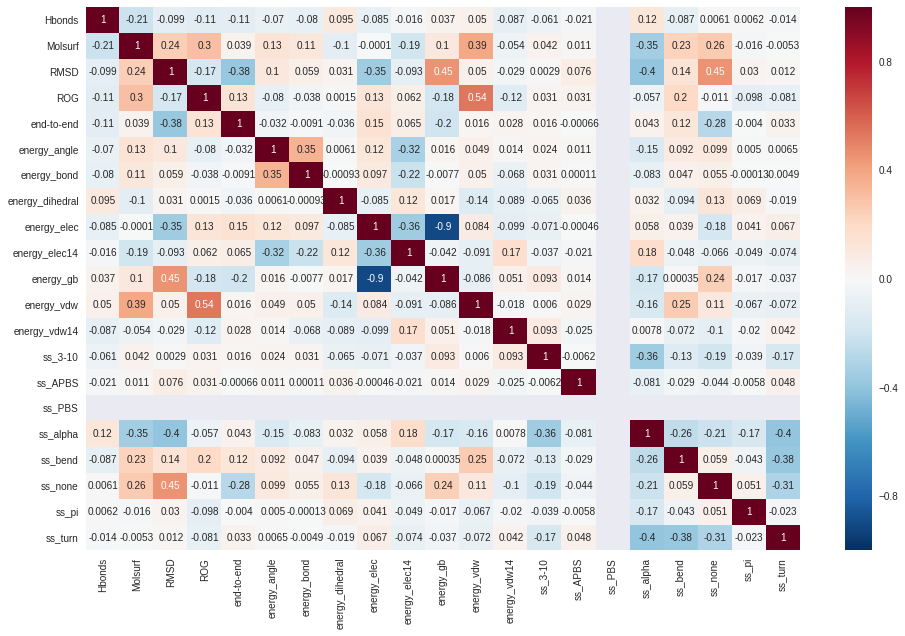

In [224]:
corr = df[df.columns].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot = True)
plt.show()

## Discussion

* RMSD and energy_gb share a fairly strong positive correlation. Perhaps by minimizing energy_gb, we can minimize RMSD?
* Energy_elec and energy_gb are highly negatively correlated, why?


## Further Work

* Add total energy as a feature to this dataframe in the intro, how is this correlated with the other features?

## Feature Extraction

In [225]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [226]:
X = df.iloc[:,0:8] # set descriptors
Y = df.iloc[:,8] # set target as RMSD column
select_top_4 = SelectKBest(score_func=chi2, k = 4) # select the top 4 performing features

In [227]:
column_names

Index(['Hbonds', 'Molsurf', 'RMSD', 'ROG', 'end-to-end', 'energy_angle',
       'energy_bond', 'energy_dihedral', 'energy_elec', 'energy_elec14',
       'energy_gb', 'energy_vdw', 'energy_vdw14', 'ss_3-10', 'ss_APBS',
       'ss_PBS', 'ss_alpha', 'ss_bend', 'ss_none', 'ss_pi'],
      dtype='object')

## How does the RMSD and total energy evolve over time, in the simulation?

* 'Frame' describes the time that has elapsed within the molecular dynamics simulation 

In [228]:
# return the total energy for each frame
all_energy_terms = df.iloc[:,5:13]
total_energy = all_energy_terms.sum(axis=1)

# append total_energy to existing dataframe
df['total_energy'] = total_energy

# create new dataframe of just total energy and rmsd
total_energy_v_rmsd = df.iloc[:,-1]
total_energy_v_rmsd = total_energy_v_rmsd.to_frame()
total_energy_v_rmsd['RMSD'] = df.iloc[:,2]

total_energy_v_rmsd.head()

# how do the other terms effect the total energy?
# which energy terms contribute most to the total energy?
# how are total energy and RMSD correlated?

,total_energy,RMSD
Frame,,
0,-312.114451,4.234889
1,-312.299985,4.226051
2,-315.325563,4.246277
3,-312.515474,4.382348
4,-310.014401,4.199144


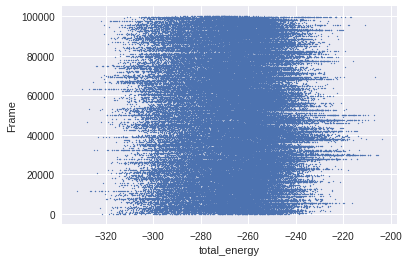

In [229]:
y = total_energy_v_rmsd.index

plt.scatter(total_energy_v_rmsd['total_energy'], y, s=1) # s describes the size of the marker
plt.xlabel('total_energy')
plt.ylabel('Frame')
plt.show()

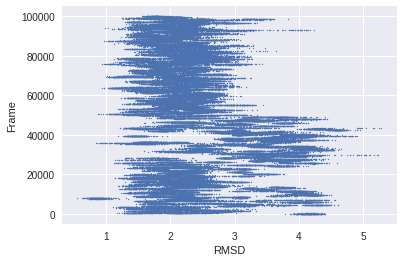

In [230]:
y = total_energy_v_rmsd.index

plt.scatter(total_energy_v_rmsd['RMSD'], y, s=1)
plt.xlabel('RMSD')
plt.ylabel('Frame')
plt.show()

### Note:

* There seems to be a rapid decrease in RMSD around frame 50,000. Why is this?
* RMSD seems to increase temporarily between frames 20,000-50,000. 
* RMSD spike near the end of the simulation.

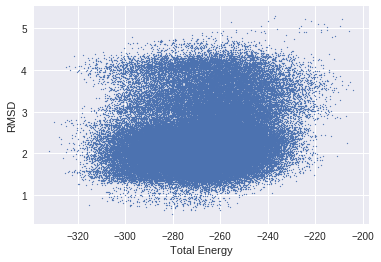

In [231]:
# phase portrait
plt.scatter(total_energy_v_rmsd['total_energy'], total_energy_v_rmsd['RMSD'], s=1)
plt.xlabel('Total Energy')
plt.ylabel('RMSD')
plt.show()

## Conclusions

* Total energy alone can not accurately predict RMSD. We need to see how the other parameters effect RMSD. 

## Note:

* The 100,000 frames are actually 100 seperate different MD simulations that last for 1,000 frames each. 
* Plot a single MD run, and also see an average

In [232]:
# classification of near native structures
# regression of RMSD

In [233]:
df.head()

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.114451
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.299985
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-315.325563
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-312.515474
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-310.014401


In [234]:
c = []

for row in df['RMSD']:
    if row < 1.5:
        c.append('Near Native')
    else:
        c.append('Far Native')

df['Class'] = c
df.head()    

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy,Class
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.114451,Far Native
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.299985,Far Native
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-315.325563,Far Native
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-312.515474,Far Native
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-310.014401,Far Native


In [235]:
y = df['Class']
X = df.iloc[:,0:22]


# X = X.drop(df.index[2])# , axis=1)

X.head()

# df.shape

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.114451
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.299985
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-315.325563
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-312.515474
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-310.014401


In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   random_state=123)#,
#                                                    stratify=y)

In [237]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.94981818181818178

## Feature Extraction

* Determine the top performing features, to understand where to focus our efforts

In [238]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [239]:
y = df['Class']
X = df.iloc[:,0:22]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [240]:
# fit = select_top_4.fit(X,y)
# features = fit.transform(X)

# features[0:5]

## Pre-processing: Standardization

In [241]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X)

X = pd.DataFrame(data = rescaledX, columns= X.columns)

X.head()

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
0,1.250766,-0.578035,2.467412,-1.486130,0.209753,-1.623187,-1.643516,0.016896,-1.388477,1.513560,...,-0.793378,-0.494948,-0.091513,0.0,0.469476,-0.781074,1.915769,-0.089135,-0.715461,-2.601530
1,-0.223742,-0.120379,2.455287,-1.018724,0.302680,-1.718527,-0.836015,-0.918655,-1.624248,1.489597,...,-1.332333,-0.494948,-0.091513,0.0,0.469476,-0.781074,1.915769,-0.089135,-0.715461,-2.612176
2,-0.223742,0.383999,2.483033,-1.345560,0.230075,-2.027253,-2.322785,-0.702762,-1.100952,1.721766,...,0.707390,-0.494948,-0.091513,0.0,0.469476,-0.781074,1.915769,-0.089135,-0.715461,-2.785787
3,-0.960996,0.762916,2.669687,-1.319296,0.294202,-1.507856,-1.961272,-0.709704,-1.229227,1.143021,...,-1.260626,-0.494948,-0.091513,0.0,-0.005861,-0.781074,1.915769,-0.089135,-0.223218,-2.624541
4,-0.223742,-0.219250,2.418378,-1.473739,-0.028149,-1.757839,-2.624368,0.536007,-1.224184,1.476316,...,-0.575853,-0.494948,-0.091513,0.0,-0.005861,-0.781074,1.915769,-0.089135,-0.223218,-2.481027


## Predictions and Comparing Classification Algorithms

Let's try out a bunch of classifiers, all with default parameters

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=123)

In [243]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [244]:
models = []
models.append(("Logistic Regression",LogisticRegression()))
models.append(("k-Nearest Neighbour",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Support Vector Machine",SVC()))

In [245]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Logistic Regression 0.998029850746
k-Nearest Neighbour 0.963567164179
Decision Tree 1.0
Support Vector Machine 0.991059701493


In [246]:
name = ['Logistic Regression',]

for i in range(len(names)):
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (names[i], 100*results[i].mean(), 100*results[i].std() * 2))

 Logistic Regression | Accuracy: 99.80% (+/- 0.11%)
 k-Nearest Neighbour | Accuracy: 96.36% (+/- 0.38%)
       Decision Tree | Accuracy: 100.00% (+/- 0.00%)
Support Vector Machine | Accuracy: 99.11% (+/- 0.31%)


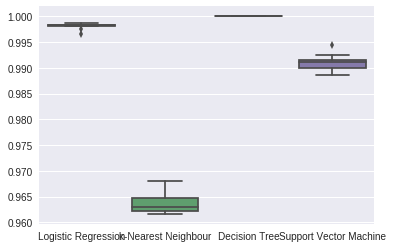

In [247]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

# Final Prediction using Test Data

Logistic Regression and Decision Trees provided maximum results.

In [272]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [274]:
print(accuracy_score(y_test,predictions))

0.998121212121


In [275]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

 Far Native       1.00      1.00      1.00     31232
Near Native       1.00      0.97      0.98      1768

avg / total       1.00      1.00      1.00     33000



In [276]:
conf = confusion_matrix(y_test, predictions)

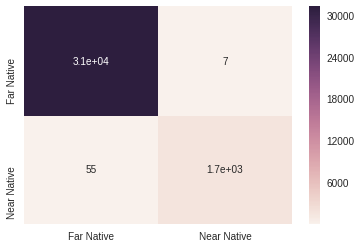

In [277]:
label = ["Far Native","Near Native"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)

In [278]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [279]:
print(accuracy_score(y_test, predictions))

1.0


In [280]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

 Far Native       1.00      1.00      1.00     31232
Near Native       1.00      1.00      1.00      1768

avg / total       1.00      1.00      1.00     33000



In [281]:
conf = confusion_matrix(y_test, predictions)

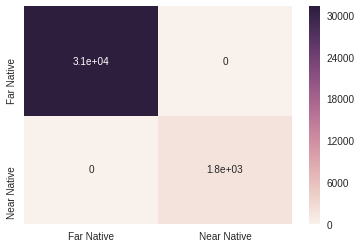

In [282]:
label = ["Far Native","Near Native"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)